<a href="https://colab.research.google.com/github/Sanjay1802/Machine-Learning/blob/main/LinearRegressionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#EDA - Exploratory Data Analysis
#1. null values
#2. duplicate values
#3. outliers
#4. label encoding

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
df.isnull().sum().sum()

np.int64(52)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
for col in df.columns:
  if df[col].dtype == 'object':
    df[col]=df[col].fillna(df[col].mode()[0])
  else:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

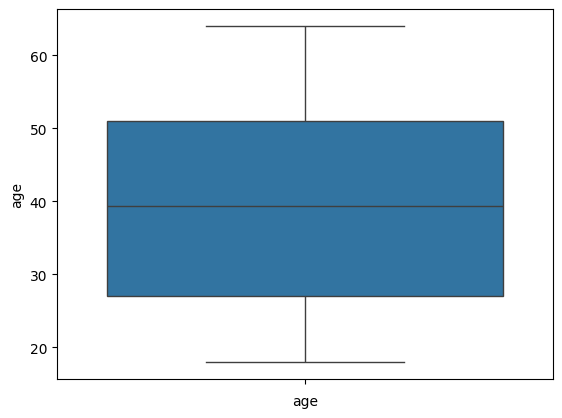

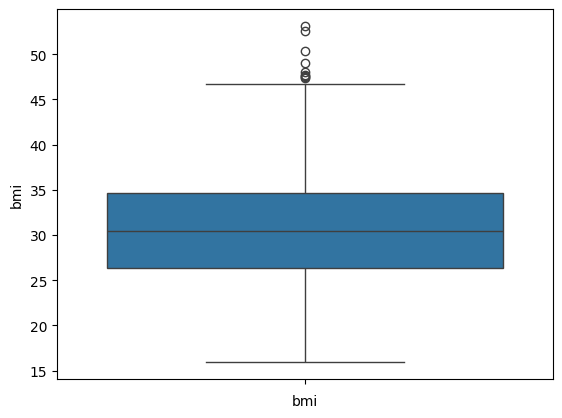

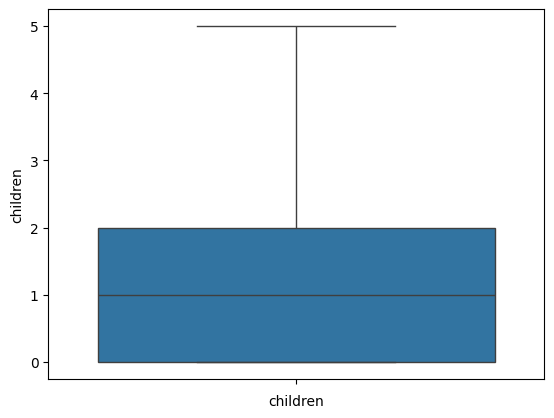

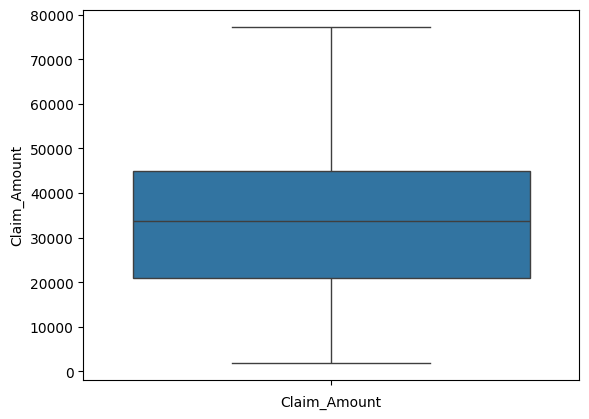

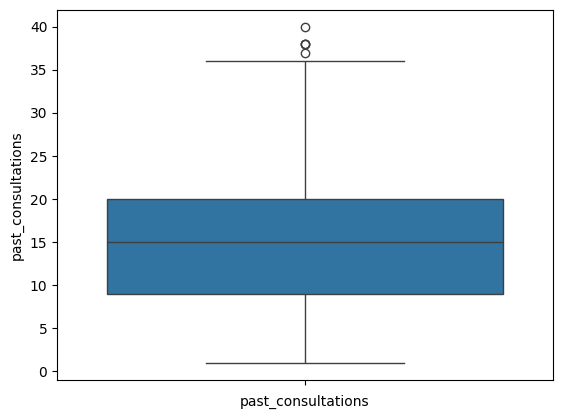

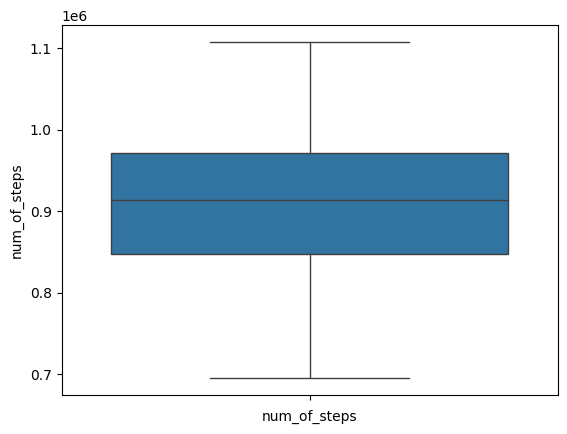

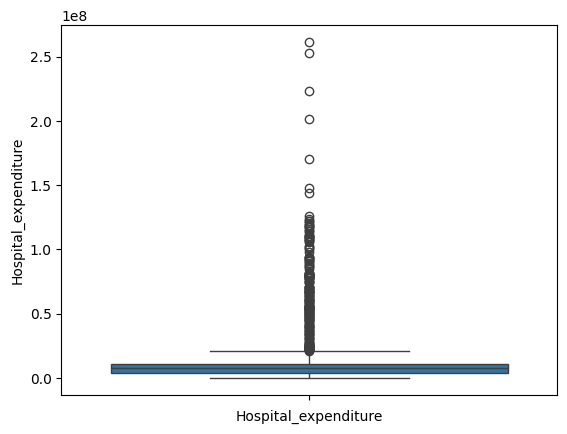

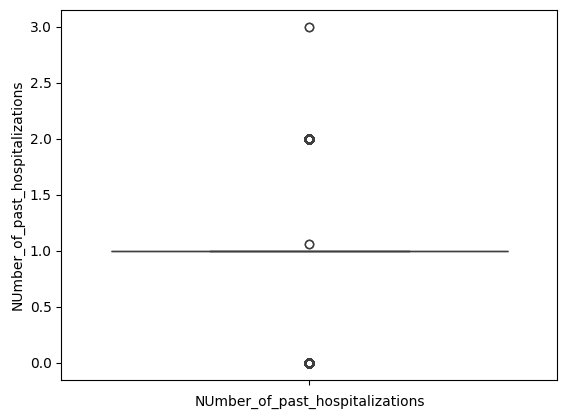

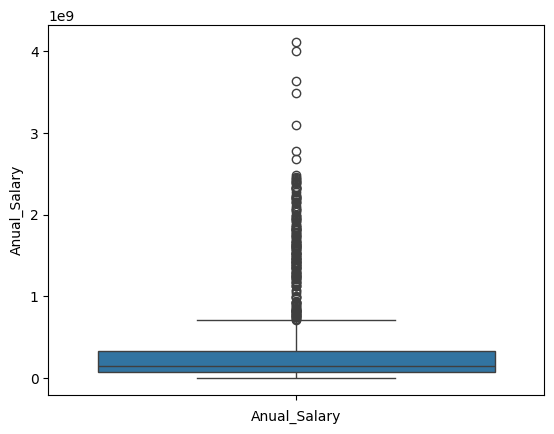

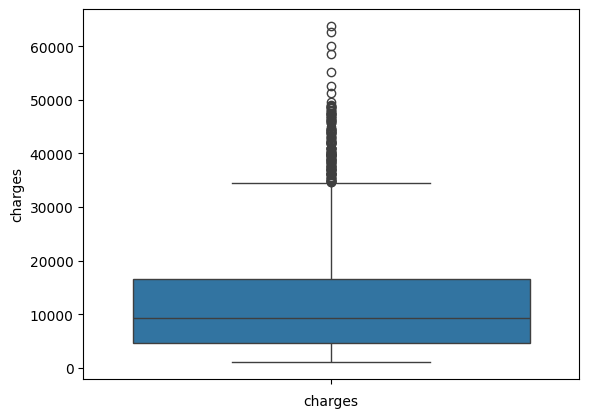

In [ ]:
#OUTLIER VISUALISATION

for col in df.columns:
  if(df[col].dtype != 'object'):
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
#OUTLIER REMOVAL

out_list=['bmi', 'past_consultations', 'Hospital_expenditure','Anual_Salary']

for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)

  IQR=Q3-Q1

  LB=Q1-1.5*(IQR)
  UB=Q3+1.5*(IQR)

  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              995 non-null    float64
 1   sex                              995 non-null    object 
 2   bmi                              995 non-null    float64
 3   children                         995 non-null    float64
 4   smoker                           995 non-null    object 
 5   Claim_Amount                     995 non-null    float64
 6   past_consultations               995 non-null    float64
 7   num_of_steps                     995 non-null    float64
 8   Hospital_expenditure             995 non-null    float64
 9   NUmber_of_past_hospitalizations  995 non-null    float64
 10  Anual_Salary                     995 non-null    float64
 11  region                           995 non-null    object 
 12  charges                   

In [ ]:
#Label Encoding: conversion of object(alphabetical/string) data into numerical

from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()

for col in df.columns:
  if(df[col].dtype == 'object'):
    df[col]=LE.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              995 non-null    float64
 1   sex                              995 non-null    int64  
 2   bmi                              995 non-null    float64
 3   children                         995 non-null    float64
 4   smoker                           995 non-null    int64  
 5   Claim_Amount                     995 non-null    float64
 6   past_consultations               995 non-null    float64
 7   num_of_steps                     995 non-null    float64
 8   Hospital_expenditure             995 non-null    float64
 9   NUmber_of_past_hospitalizations  995 non-null    float64
 10  Anual_Salary                     995 non-null    float64
 11  region                           995 non-null    int64  
 12  charges                   

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,5.578497e+07,2,1121.8739
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,1.370089e+07,2,1131.5066
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,7.352311e+07,2,1135.9407
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,7.581968e+07,2,1136.3994
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,2.301232e+07,2,1137.0110
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,19.0,1,29.07,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1,17352.6803
1014,30.0,1,22.99,2.0,1,42204.03781,23.0,970426.0,5963405.165,1.0,3.045704e+08,1,17361.7661
1015,19.0,0,28.31,0.0,1,50081.81030,17.0,962557.0,5636755.433,1.0,3.341483e+08,1,17468.9839
1019,28.0,1,23.98,3.0,1,41686.19886,12.0,974518.0,8679934.418,1.0,3.225795e+08,2,17663.1442


In [ ]:
x=df.iloc[:,:-1]

y=df['charges']

In [ ]:
x

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,18.0,1,23.21,0.0,0,29087.54313,17.0,715428.0,4720920.992,0.0,5.578497e+07,2
1,18.0,1,30.14,0.0,0,39053.67437,7.0,699157.0,4329831.676,0.0,1.370089e+07,2
2,18.0,1,33.33,0.0,0,39023.62759,19.0,702341.0,6884860.774,0.0,7.352311e+07,2
3,18.0,1,33.66,0.0,0,28185.39332,11.0,700250.0,4274773.550,0.0,7.581968e+07,2
4,18.0,1,34.10,0.0,0,14697.85941,16.0,711584.0,3787293.921,0.0,2.301232e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1013,19.0,1,29.07,0.0,1,58901.21861,16.0,975702.0,8830423.241,1.0,3.304683e+08,1
1014,30.0,1,22.99,2.0,1,42204.03781,23.0,970426.0,5963405.165,1.0,3.045704e+08,1
1015,19.0,0,28.31,0.0,1,50081.81030,17.0,962557.0,5636755.433,1.0,3.341483e+08,1
1019,28.0,1,23.98,3.0,1,41686.19886,12.0,974518.0,8679934.418,1.0,3.225795e+08,2


In [ ]:
y

,charges
0,1121.8739
1,1131.5066
2,1135.9407
3,1136.3994
4,1137.0110
...,...
1013,17352.6803
1014,17361.7661
1015,17468.9839
1019,17663.1442


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)
#random_state: fixes a set of sequence of rows
#splits the dataset into training(80%) and testing data(20%)
#x-train & test : Features(input data) for training and testing
#y-train & test : Target(output data) for training and testing

In [ ]:
x_train

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
876,61.0,1,31.570,0.0,0,30213.74306,24.0,928051.0,6.008076e+06,1.0,2.006449e+08,2
887,60.0,0,38.060,0.0,0,55587.42936,14.0,932871.0,1.062849e+07,1.0,1.695991e+08,2
891,59.0,0,26.505,0.0,0,37441.40236,20.0,943900.0,7.290092e+06,1.0,1.743123e+08,0
116,18.0,0,24.090,1.0,0,46857.05509,9.0,756858.0,6.236553e+06,0.0,4.312681e+07,2
616,47.0,0,45.320,1.0,0,17709.92511,7.0,901593.0,2.364269e+06,1.0,7.435770e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...
847,57.0,0,20.100,1.0,0,53248.98997,13.0,940450.0,6.002167e+06,1.0,1.924193e+08,3
197,21.0,1,23.750,2.0,0,48666.90312,16.0,801695.0,7.369025e+05,1.0,7.000701e+07,1
637,50.0,1,32.205,0.0,0,26000.57415,11.0,906546.0,1.142255e+06,1.0,9.214643e+07,1
566,45.0,0,38.285,0.0,0,27649.99552,8.0,898953.0,3.189383e+06,1.0,1.002414e+08,0


In [ ]:
y_train

,charges
876,12557.60530
887,12648.70340
891,12815.44495
116,2201.09710
616,8569.86180
...,...
847,12032.32600
197,3077.09550
637,8835.26495
566,7935.29115


In [ ]:
x_test

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
426,38.0,0,30.690,1.0,0,45637.390130,5.0,882082.0,9.278303e+06,1.0,6.394902e+07,2
1002,21.0,1,31.020,0.0,0,42441.116990,20.0,968040.0,1.129121e+07,1.0,3.239201e+08,2
34,18.0,0,38.280,0.0,0,6239.721659,2.0,736615.0,8.506856e+06,0.0,3.624640e+07,2
702,51.0,0,33.915,0.0,0,52777.986870,4.0,924530.0,6.973392e+06,1.0,1.493287e+08,0
560,45.0,0,35.815,0.0,0,29622.261030,6.0,886052.0,7.579867e+06,1.0,1.589946e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...
779,56.0,0,39.820,0.0,0,28716.572060,22.0,942062.0,8.381702e+06,1.0,1.957085e+08,2
971,26.0,0,17.195,2.0,1,39926.677930,21.0,961242.0,9.256594e+06,1.0,2.892198e+08,0
388,36.0,1,33.820,1.0,0,47536.756510,18.0,865217.0,2.569334e+06,1.0,1.164331e+08,1
276,28.0,0,25.935,1.0,0,11956.778020,9.0,834438.0,8.242273e+06,1.0,7.411409e+07,1


In [ ]:
y_test

,charges
426,5976.83110
1002,16586.49771
34,1631.82120
702,9866.30485
560,7731.85785
...,...
779,11090.71780
971,14455.64405
388,5377.45780
276,4133.64165


In [ ]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([ 6589.1938976 , 12012.16099248,   838.79064699, 10256.34440593,
        8614.47701245,  7375.31513576,  7100.70869454, 10921.72088813,
       13561.63815485,  8782.93213299,  5675.12239388,  7249.94405456,
        3898.47261341,  2197.12649888, 12365.53505917, 11609.95941088,
        5067.87598302,  6453.64010371,  4951.81359863,  1443.35421839,
        3406.26479543,  1981.89189348,  9423.60254935,  1770.74122702,
        2384.58684216, 12162.15976945,  9133.06668063, 13565.61846349,
        4494.01573173,  8554.38318197, 10875.94965812,  9892.57376482,
         873.61357039,  3776.63926205, 16103.40405998,  4259.1299765 ,
        7845.53282558,  5125.31740025,  4579.5127507 ,  7001.0867153 ,
        5195.58860731,  2903.56445387,  7086.90683116, 11251.66585601,
        1055.74379881, 10207.66567683, 13756.41233362,  8821.48682575,
        6987.23458343, 14049.31902313,  4024.96866856,  6813.05257079,
        5289.61935227,  9196.73547122,  5753.06410528,  3850.01552374,
      

In [ ]:
result=pd.DataFrame(columns=['Actual_values','Predicted_values'])
result['Actual_values']=y_test
result['Predicted_values']=y_pred
result

,Actual_values,Predicted_values
426,5976.83110,6589.193898
1002,16586.49771,12012.160992
34,1631.82120,838.790647
702,9866.30485,10256.344406
560,7731.85785,8614.477012
...,...,...
779,11090.71780,11873.893252
971,14455.64405,16226.568519
388,5377.45780,6549.222924
276,4133.64165,4457.790014


In [ ]:
from sklearn.metrics import * # * = all the data

res=r2_score(y_test,y_pred)
res*100

95.17495980058057

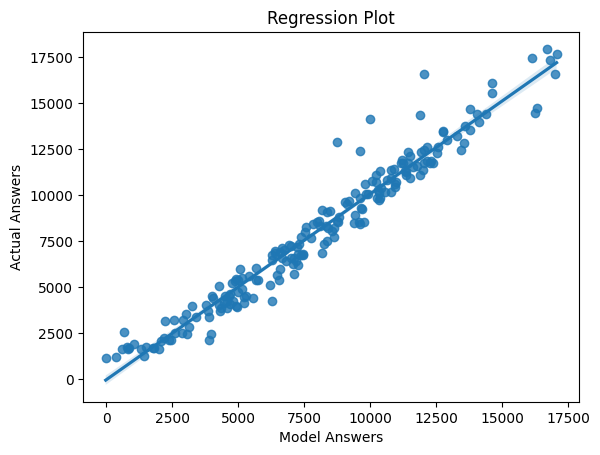

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.title("Regression Plot")
plt.xlabel('Model Answers')
plt.ylabel('Actual Answers')
plt.show()